### Image Compression using K-Means Algorithm

In [1]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

%matplotlib inline

In [2]:
# reading the image
image = io.imread('dog.png')

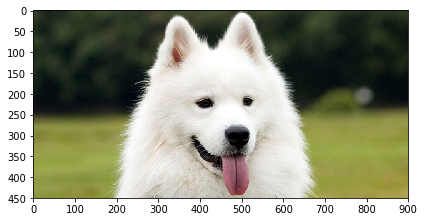

In [3]:
io.imshow(image);

In [4]:
image.shape

(450, 900, 3)

In [5]:
# preprocessing
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

In [6]:
print(image.shape)
print(image[:5])

(405000, 3)
[[62 74 50]
 [61 73 49]
 [60 72 48]
 [58 70 46]
 [56 68 44]]


In [7]:
# modelling
kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
# centers
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[ 21,  31,  22],
       [210, 206, 196],
       [154, 159,  73],
       [248, 248, 246],
       [ 76,  80,  47],
       [172, 164, 142],
       [ 35,  46,  31],
       [237, 236, 231],
       [141, 146,  64],
       [109,  90,  87],
       [193, 188, 174],
       [225, 222, 216],
       [  8,  17,  16],
       [148, 116, 116],
       [ 52,  61,  40],
       [110, 113,  55]], dtype=uint8)

In [9]:
# labels 
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(405000,)
(450, 900)


array([[ 4, 14, 14, ..., 14, 14, 14],
       [ 4, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       ...,
       [ 8,  8,  8, ...,  2,  2,  2],
       [ 8,  8,  8, ...,  2,  2,  2],
       [ 8,  8,  8, ...,  2,  2,  2]], dtype=uint8)

In [10]:
# reconstructing
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('dog-compressed.png', newImage);

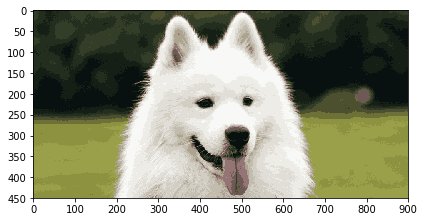

In [12]:
io.imshow(newImage);